## Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Sin Signal

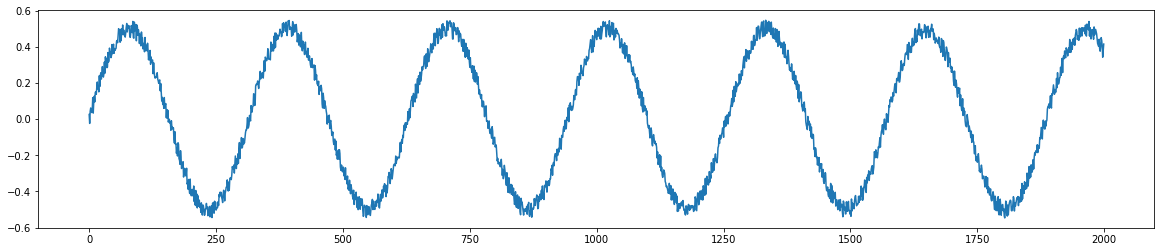

In [2]:
N = 2000
t = np.arange(0,N)
sin_data = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(sin_data)
plt.show()

## Convert Signal To Dataset

In [3]:
def convertSignalToDataset(signal,step):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(signal[j])
    
    return np.array(X), np.array(Y)

In [4]:
X_train = sin_data[:1500]
X_test = sin_data[1500:]

In [5]:
X_train, Y_train = convertSignalToDataset(X_train,15)
X_test , Y_test = convertSignalToDataset(X_test,15)

In [6]:
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]

## Model
## RNN

In [7]:
model = Sequential()
model.add(SimpleRNN(units=64,input_shape=(X_train.shape[1:])))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="linear"))

In [8]:
model.compile(optimizer=Adam(),loss=MSE)
checkpoint = ModelCheckpoint("RNN_Regression.h5",monitor="val_loss",mode="min",save_best_only=True)

In [9]:
history = model.fit(X_train,Y_train,
                   epochs=50,
                   batch_size = 32, 
                   validation_data=(X_test,Y_test),
                   callbacks=[checkpoint])

Epoch 1/50
47/47 [==============================] - 1s 10ms/step - loss: 0.0105 - val_loss: 0.0017
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 11/50
47/47 

## Predict

In [10]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
nan_data = np.ones((1500,1)) * np.nan
pred_test = np.concatenate((nan_data,pred_test),axis=0)

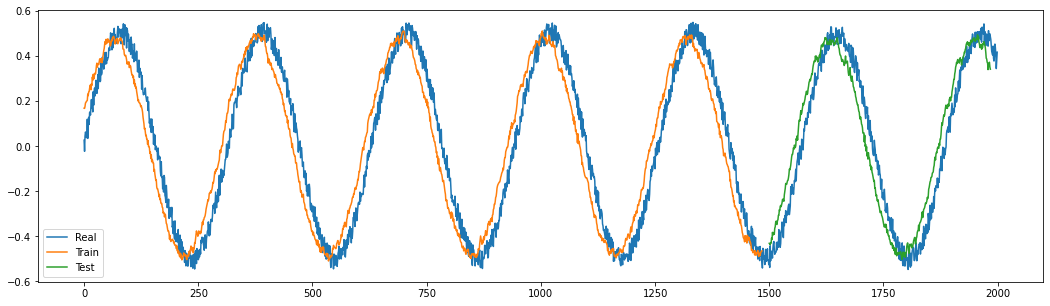

In [12]:
plt.figure(figsize=(18,5))
plt.plot(sin_data,label="Real")
plt.plot(pred_train,label="Train")
plt.plot(pred_test,label="Test")
plt.legend()
plt.show()